# Business Problem
Generally approving the loan is one of the time taking process for the Dream Housing Finanace Company.They want to Automate the process of the loan approval system.Which may saves the time of the company

# Dataset Information

   Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
   
   This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.
   
Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)

## IMPORT MODULES:

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET: 

In [2]:
df = pd.read_csv("C:/Users/91950/Downloads/Group Project/Loan Prediction Dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## PREPROCESSING THE DATASET

In [6]:
#Null values:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#filling the missing values for numerical terms with the help of mean
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())
df ['Loan_Amount_Term'] = df ['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df ['Credit_History'] = df ['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
#filling the missing values for categorical terms with the help of mode
df ['Gender'] = df ['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df ['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df ['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df1=df['Loan_Status'].value_counts()
df1
keys=['Approved Loan','Not Approved']

In [11]:
df1

Y    422
N    192
Name: Loan_Status, dtype: int64

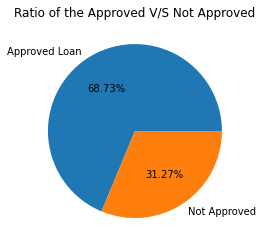

In [12]:
plt.pie(df1,labels=keys,autopct='%1.2f%%')
plt.title("Ratio of the Approved V/S Not Approved")
plt.show()

In [13]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

In [14]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(df. loc[:, df. columns != "Loan_Status"], df["Loan_Status"])
# Check the number of records after over sampling
print(sorted(Counter(y).items()))

[('N', 422), ('Y', 422)]


In [15]:
df = pd.concat([X,y] , axis=1)

## EXPLORATORY DATA ANALYSIS:

##### CATEGORICAL ATTRIBUTE VISUALIZATION:

<AxesSubplot:xlabel='Gender', ylabel='count'>

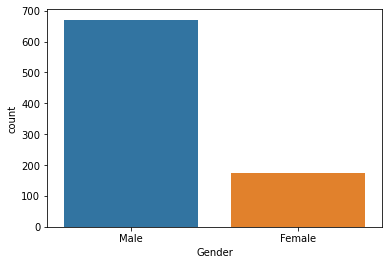

In [16]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

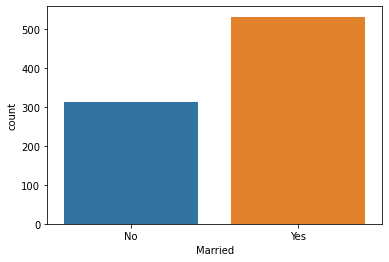

In [17]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

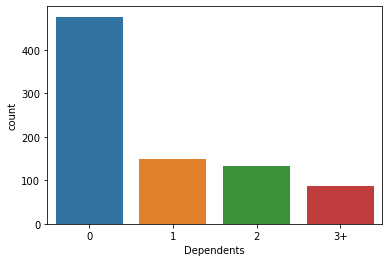

In [18]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

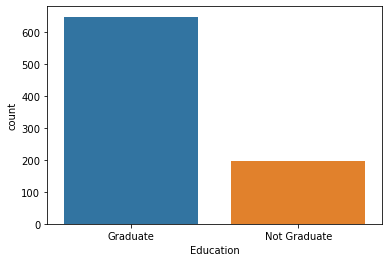

In [19]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

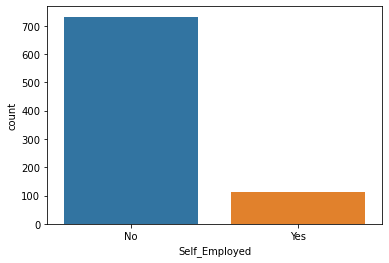

In [20]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

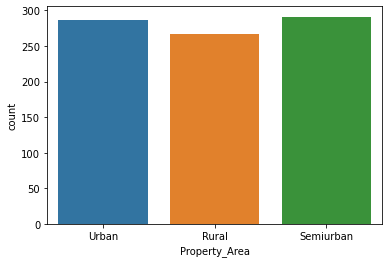

In [21]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

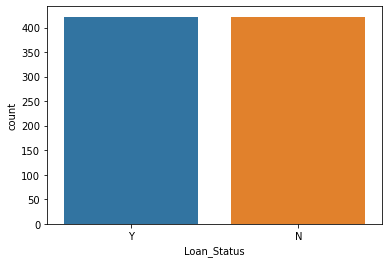

In [22]:
sns.countplot(df['Loan_Status'])

##### NUMERICAL ATTRIBUTE VISUALIZATION:

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

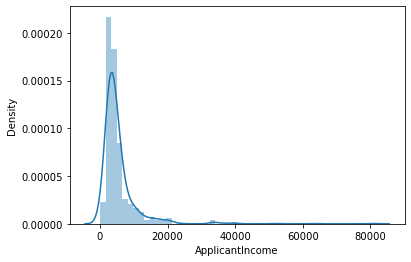

In [23]:
sns.distplot(df['ApplicantIncome'])

In [24]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

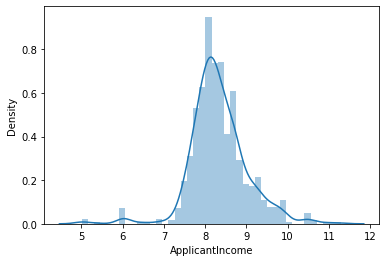

In [25]:
sns.distplot(df['ApplicantIncome'])

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

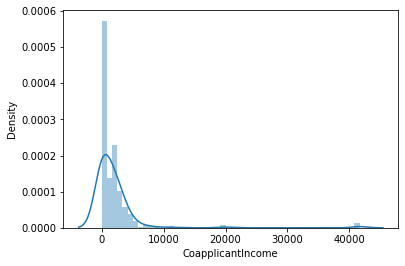

In [27]:
sns.distplot(df['CoapplicantIncome'])

In [28]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']+1)

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

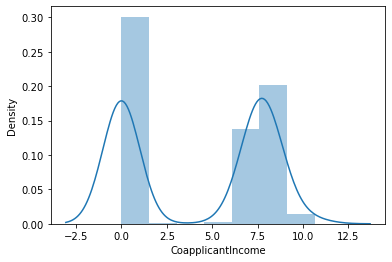

In [30]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

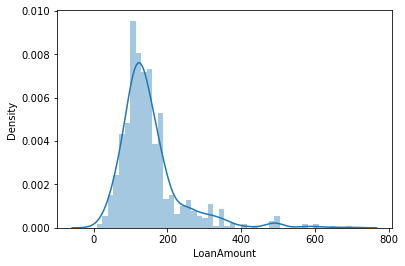

In [31]:
sns.distplot(df['LoanAmount'])

In [32]:
df['LoanAmount'] = np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

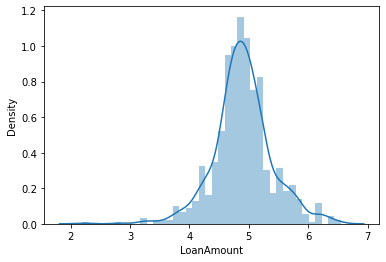

In [33]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

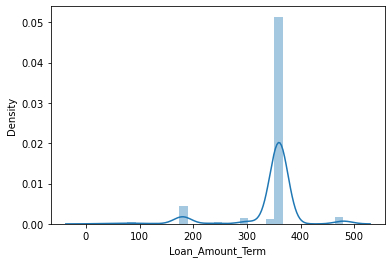

In [34]:
sns.distplot(df['Loan_Amount_Term'])

In [35]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

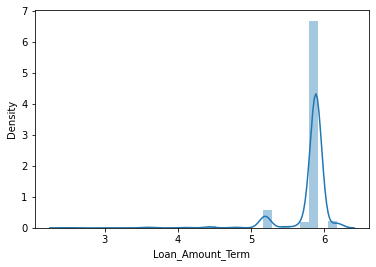

In [36]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

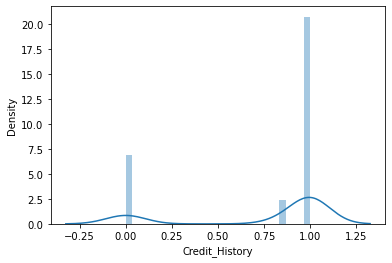

In [37]:
sns.distplot(df['Credit_History'])

## CREATING NEW ATTRIBUTES:

In [38]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,15.749312
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,15.622700
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515


## LOG TRANSFORMATION:

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

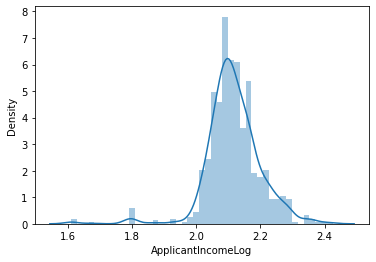

In [40]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

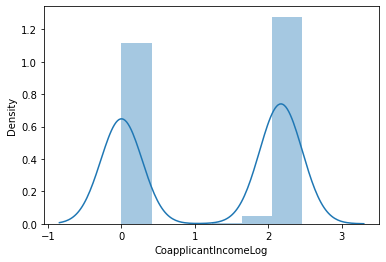

In [41]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

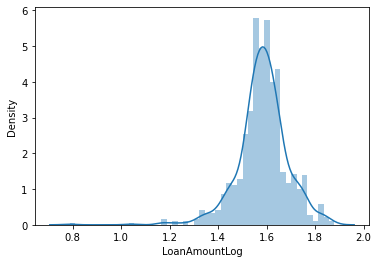

In [42]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

<AxesSubplot:xlabel='Loan_Amount_TermLog', ylabel='Density'>

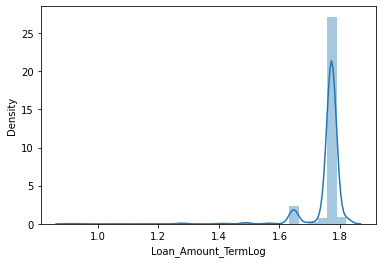

In [43]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_TermLog'])

<AxesSubplot:xlabel='Total_IncomeLog', ylabel='Density'>

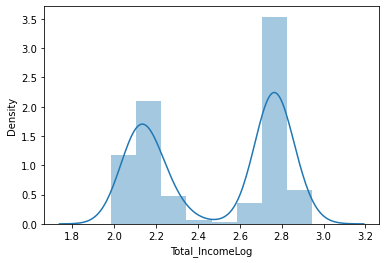

In [44]:
df['Total_IncomeLog'] = np.log(df['Total_Income'])
sns.distplot(df['Total_IncomeLog'])

## CORRELATION MATRIX:

In [45]:
corr = df.corr()

<AxesSubplot:>

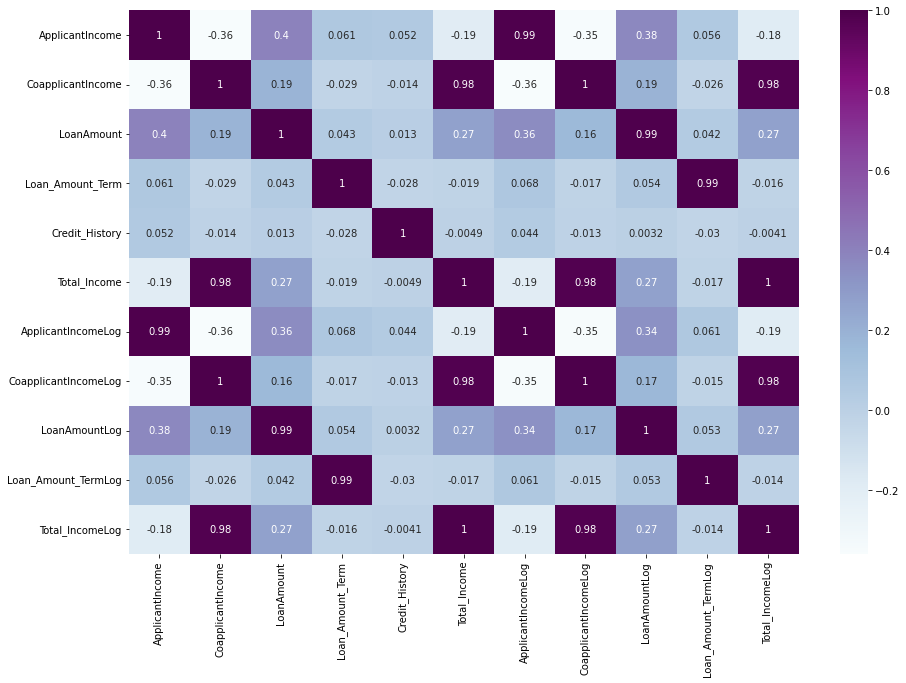

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

## LABEL ENCODING:

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    df[col] = le.fit_transform(df[col])

In [49]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,2,1,8.674026,2.160333,0.000000,1.606719,1.772594,2.160333
1,LP001003,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,0,15.749312,2.131810,2.118566,1.579397,1.772594,2.756797
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,2,1,8.006368,2.080237,0.000000,1.432618,1.772594,2.080237
3,LP001006,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,2,1,15.622700,2.061368,2.170880,1.566007,1.772594,2.748725
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,2,1,8.699515,2.163267,0.000000,1.599137,1.772594,2.163267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,LP001682,1,1,3,1,0,8.292048,0.000000,4.986426,5.192957,1.000000,2,0,8.292048,2.115297,0.000000,1.606719,1.647303,2.115297
840,LP002898,1,1,1,0,0,7.539027,0.000000,4.110874,5.886104,0.842199,0,0,7.539027,2.020093,0.000000,1.413636,1.772594,2.020093
841,LP002911,1,1,1,0,0,7.932721,7.559038,4.983607,5.886104,0.000000,0,0,15.491759,2.070996,2.146988,1.606154,1.772594,2.740308
842,LP002288,1,1,2,1,0,7.968666,0.000000,3.806662,5.192957,0.000000,2,0,7.968666,2.075517,0.000000,1.336753,1.647303,2.075517


### Chi Square Technique for Categorial Data

In [50]:
from sklearn.feature_selection import chi2

In [51]:
X=df[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]

In [52]:
y=df['Loan_Status']

In [53]:
chi_score=chi2(X,y)

In [54]:
chi_score

(array([0.78837556, 3.63909774, 5.52791878, 0.        , 0.84472769,
        2.14880952]),
 array([0.37459177, 0.05643751, 0.01871535, 1.        , 0.35804814,
        0.14268048]))

In [55]:
df1 = pd.concat([X,y],axis=1)
df1  

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Loan_Status
0,1,0,0,0,2,0,1
1,1,1,0,0,0,1,0
2,1,1,0,1,2,0,1
3,1,1,1,0,2,0,1
4,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...
839,1,1,1,0,2,3,0
840,1,1,0,0,0,1,0
841,1,1,0,0,0,1,0
842,1,1,1,0,2,2,0


In [56]:
df2=pd.concat([df,df1],axis=1)

In [57]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,...,1.606719,1.772594,2.160333,1,0,0,0,2,0,1
1,LP001003,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,...,1.579397,1.772594,2.756797,1,1,0,0,0,1,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,...,1.432618,1.772594,2.080237,1,1,0,1,2,0,1
3,LP001006,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,...,1.566007,1.772594,2.748725,1,1,1,0,2,0,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,...,1.599137,1.772594,2.163267,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,LP001682,1,1,3,1,0,8.292048,0.000000,4.986426,5.192957,...,1.606719,1.647303,2.115297,1,1,1,0,2,3,0
840,LP002898,1,1,1,0,0,7.539027,0.000000,4.110874,5.886104,...,1.413636,1.772594,2.020093,1,1,0,0,0,1,0
841,LP002911,1,1,1,0,0,7.932721,7.559038,4.983607,5.886104,...,1.606154,1.772594,2.740308,1,1,0,0,0,1,0
842,LP002288,1,1,2,1,0,7.968666,0.000000,3.806662,5.192957,...,1.336753,1.647303,2.075517,1,1,1,0,2,2,0


In [58]:
df=df.drop('Loan_ID',axis=1)

### Chi Square Technique for Categorial Data

In [59]:
from sklearn.feature_selection import chi2

In [60]:
X=df[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]

In [61]:
y=df['Loan_Status']

In [62]:
chi_score=chi2(X,y)

In [63]:
chi_score

(array([0.78837556, 3.63909774, 5.52791878, 0.        , 0.84472769,
        2.14880952]),
 array([0.37459177, 0.05643751, 0.01871535, 1.        , 0.35804814,
        0.14268048]))

In [64]:
df1 = pd.concat([X,y],axis=1)
df1  

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Loan_Status
0,1,0,0,0,2,0,1
1,1,1,0,0,0,1,0
2,1,1,0,1,2,0,1
3,1,1,1,0,2,0,1
4,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...
839,1,1,1,0,2,3,0
840,1,1,0,0,0,1,0
841,1,1,0,0,0,1,0
842,1,1,1,0,2,2,0


In [65]:
df2=pd.concat([df,df1],axis=1)

In [66]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog,Gender,Married,Education,Self_Employed,Property_Area,Dependents,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,...,1.606719,1.772594,2.160333,1,0,0,0,2,0,1
1,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,...,1.579397,1.772594,2.756797,1,1,0,0,0,1,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,...,1.432618,1.772594,2.080237,1,1,0,1,2,0,1
3,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,...,1.566007,1.772594,2.748725,1,1,1,0,2,0,1
4,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,...,1.599137,1.772594,2.163267,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,8.292048,0.000000,4.986426,5.192957,1.000000,...,1.606719,1.647303,2.115297,1,1,1,0,2,3,0
840,1,1,1,0,0,7.539027,0.000000,4.110874,5.886104,0.842199,...,1.413636,1.772594,2.020093,1,1,0,0,0,1,0
841,1,1,1,0,0,7.932721,7.559038,4.983607,5.886104,0.000000,...,1.606154,1.772594,2.740308,1,1,0,0,0,1,0
842,1,1,2,1,0,7.968666,0.000000,3.806662,5.192957,0.000000,...,1.336753,1.647303,2.075517,1,1,1,0,2,2,0


In [67]:
df=df.drop('Gender',axis=1)

In [68]:
df=df.drop('Property_Area',axis=1)

In [69]:
df.drop('Self_Employed',axis=1)

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,1,8.674026,2.160333,0.000000,1.606719,1.772594,2.160333
1,1,1,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,15.749312,2.131810,2.118566,1.579397,1.772594,2.756797
2,1,0,0,8.006368,0.000000,4.189655,5.886104,1.000000,1,8.006368,2.080237,0.000000,1.432618,1.772594,2.080237
3,1,0,1,7.856707,7.765993,4.787492,5.886104,1.000000,1,15.622700,2.061368,2.170880,1.566007,1.772594,2.748725
4,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,1,8.699515,2.163267,0.000000,1.599137,1.772594,2.163267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,3,1,8.292048,0.000000,4.986426,5.192957,1.000000,0,8.292048,2.115297,0.000000,1.606719,1.647303,2.115297
840,1,1,0,7.539027,0.000000,4.110874,5.886104,0.842199,0,7.539027,2.020093,0.000000,1.413636,1.772594,2.020093
841,1,1,0,7.932721,7.559038,4.983607,5.886104,0.000000,0,15.491759,2.070996,2.146988,1.606154,1.772594,2.740308
842,1,2,1,7.968666,0.000000,3.806662,5.192957,0.000000,0,7.968666,2.075517,0.000000,1.336753,1.647303,2.075517


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def vif(data):
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return vif

In [72]:
vif(df)

,features,VIF
4,ApplicantIncome,inf
5,CoapplicantIncome,inf
10,Total_Income,inf
14,Loan_Amount_TermLog,46552.46
11,ApplicantIncomeLog,26517.14
7,Loan_Amount_Term,21609.23
13,LoanAmountLog,18583.20
15,Total_IncomeLog,16056.70
6,LoanAmount,8630.52
12,CoapplicantIncomeLog,532.09


In [73]:
df=df.drop('ApplicantIncome',axis=1)

In [74]:
df=df.drop('CoapplicantIncome',axis=1)

In [75]:
df=df.drop('Total_Income',axis=1)

In [76]:
vif(df)

,features,VIF
11,Loan_Amount_TermLog,25946.12
5,Loan_Amount_Term,12912.00
10,LoanAmountLog,11680.94
12,Total_IncomeLog,10600.84
4,LoanAmount,5185.55
8,ApplicantIncomeLog,3428.45
9,CoapplicantIncomeLog,390.82
6,Credit_History,5.98
0,Married,3.34
7,Loan_Status,2.88


In [77]:
df=df.drop('CoapplicantIncomeLog',axis=1)

In [78]:
vif(df)

,features,VIF
10,Loan_Amount_TermLog,17329.15
9,LoanAmountLog,11680.85
5,Loan_Amount_Term,8831.70
4,LoanAmount,5147.59
8,ApplicantIncomeLog,729.86
11,Total_IncomeLog,84.69
6,Credit_History,5.98
0,Married,3.33
7,Loan_Status,2.88
1,Dependents,1.84


In [79]:
df.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,0,0,0,0,4.986426,5.886104,1.0,1,2.160333,1.606719,1.772594,2.160333
1,1,1,0,0,4.852030,5.886104,1.0,0,2.131810,1.579397,1.772594,2.756797
2,1,0,0,1,4.189655,5.886104,1.0,1,2.080237,1.432618,1.772594,2.080237
3,1,0,1,0,4.787492,5.886104,1.0,1,2.061368,1.566007,1.772594,2.748725
4,0,0,0,0,4.948760,5.886104,1.0,1,2.163267,1.599137,1.772594,2.163267


In [80]:
df=df.drop('Loan_Amount_Term',axis=1)

In [81]:
vif(df)

,features,VIF
8,LoanAmountLog,7161.16
4,LoanAmount,3122.42
9,Loan_Amount_TermLog,719.32
7,ApplicantIncomeLog,616.94
10,Total_IncomeLog,81.31
5,Credit_History,5.94
0,Married,3.31
6,Loan_Status,2.87
1,Dependents,1.78
2,Education,1.40


In [82]:
df=df.drop('LoanAmount',axis=1)

In [83]:
vif(df)

,features,VIF
6,ApplicantIncomeLog,540.26
8,Loan_Amount_TermLog,444.99
7,LoanAmountLog,327.81
9,Total_IncomeLog,78.91
4,Credit_History,5.93
0,Married,3.31
5,Loan_Status,2.86
1,Dependents,1.78
2,Education,1.35
3,Self_Employed,1.19


In [84]:
df=df.drop('ApplicantIncomeLog',axis=1)


In [85]:
df=df.drop('Loan_Amount_TermLog',axis=1)

In [86]:
vif(df)

,features,VIF
7,Total_IncomeLog,73.31
6,LoanAmountLog,72.56
4,Credit_History,5.93
0,Married,3.27
5,Loan_Status,2.80
1,Dependents,1.75
2,Education,1.32
3,Self_Employed,1.18


## TRAIN-TEST SPLIT:

In [87]:
X = df.drop(columns = ['Loan_Status'],axis =1)

In [88]:
y = df['Loan_Status']

In [89]:
from sklearn.model_selection import StratifiedShuffleSplit

In [90]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=40)
for train_data,test_data in sss.split(X,y):
    train_df=df.loc[train_data]
    test_df=df.loc[test_data]


In [91]:
X_train=train_df.drop('Loan_Status',axis=1)

In [92]:
Y_train=train_df['Loan_Status']

In [93]:
X_test=test_df.drop('Loan_Status',axis=1)

In [94]:
Y_test=test_df['Loan_Status']

In [95]:
Y_train.value_counts()/Y_train.shape[0]
Y_test.value_counts()/Y_train.shape[0]

1    0.215254
0    0.215254
Name: Loan_Status, dtype: float64

## MODEL TRAINING:


In [96]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    model.fit(X_train,Y_train)
    print("Accuracy is ", model.score(X_test,Y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross validation is ," ,np.mean(score)*100)

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X_train,Y_train)

Accuracy is  74.80314960629921
Cross validation is , 73.38983050847457


In [98]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model,X_train, Y_train)

Accuracy is  72.44094488188976
Cross validation is , 70.84745762711864


In [99]:
from sklearn.metrics import confusion_matrix
Y_pred=model.predict(X_test)
cm = confusion_matrix(Y_pred,Y_test)

In [100]:
cm

array([[89, 32],
       [38, 95]], dtype=int64)

<AxesSubplot:>

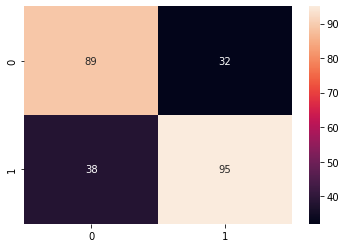

In [101]:
sns.heatmap(cm,annot=True)
